In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/Motor_Vehicle_Collisions_-_Crashes_20250103.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-6-537acc58bc74>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/Motor_Vehicle_Collisions_-_Crashes_20250103.csv")


In [ ]:
print(data.head())

   CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN  11208.0  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN  11233.0  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                      NaN  ...                    Unspecified   
1             

In [ ]:
desc_stats = data.describe()
desc_stats

LATITUDE     LONGITUDE  NUMBER OF PERSONS INJURED  \
count  1.906898e+06  1.906898e+06               2.146419e+06   
mean   4.062074e+01 -7.373944e+01               3.194339e-01   
std    2.049563e+00  3.840054e+00               7.079482e-01   
min    0.000000e+00 -2.013600e+02               0.000000e+00   
25%    4.066757e+01 -7.397469e+01               0.000000e+00   
50%    4.072055e+01 -7.392705e+01               0.000000e+00   
75%    4.076962e+01 -7.386674e+01               0.000000e+00   
max    4.334444e+01  0.000000e+00               4.300000e+01   

       NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
count              2.146406e+06                   2.146437e+06   
mean               1.541647e-03                   5.809535e-02   
std                4.143963e-02                   2.471543e-01   
min                0.000000e+00                   0.000000e+00   
25%                0.000000e+00                   0.000000e+00   
50%                0.000000e+00                   0.000000e+00   
75%                0.000000e+00                   0.000000e+00   
max                8.000000e+00                   2.700000e+01   

       NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  \
count                  2.146437e+06               2.146437e+06   
mean                   7.617275e-04               2.795610e-02   
std                    2.815720e-02               1.669812e-01   
min                    0.000000e+00               0.000000e+00   
25%                    0.000000e+00               0.000000e+00   
50%                    0.000000e+00               0.000000e+00   
75%                    0.000000e+00               0.000000e+00   
max                    6.000000e+00               4.000000e+00   

       NUMBER OF CYCLIST KILLED  NUMBER OF MOTORIST INJURED  \
count              2.146437e+06                2.146437e+06   
mean               1.206651e-04                2.291677e-01   
std                1.102644e-02                6.691012e-01   
min                0.000000e+00                0.000000e+00   
25%                0.000000e+00                0.000000e+00   
50%                0.000000e+00                0.000000e+00   
75%                0.000000e+00                0.000000e+00   
max                2.000000e+00                4.300000e+01   

       NUMBER OF MOTORIST KILLED  COLLISION_ID  
count               2.146437e+06  2.146437e+06  
mean                6.345399e-04  3.212158e+06  
std                 2.754988e-02  1.507049e+06  
min                 0.000000e+00  2.200000e+01  
25%                 0.000000e+00  3.172729e+06  
50%                 0.000000e+00  3.709484e+06  
75%                 0.000000e+00  4.246324e+06  
max                 5.000000e+00  4.783213e+06

In [ ]:
#TODO: Leverage the isnull() and sum() functions to find the number of missing values in each column
missing_values = data.isnull().sum()

#TODO: Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(data)) * 100

#TODO: Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})

# Optional: Sort the DataFrame by the percentage of missing values in descending order
missing_data = missing_data.sort_values(by='Percentage (%)', ascending=False)

# Display the missing data summary
print(missing_data)

                               Missing Values  Percentage (%)
VEHICLE TYPE CODE 5                   2137129       99.566351
CONTRIBUTING FACTOR VEHICLE 5         2136833       99.552561
VEHICLE TYPE CODE 4                   2112540       98.420778
CONTRIBUTING FACTOR VEHICLE 4         2111283       98.362216
VEHICLE TYPE CODE 3                   1997699       93.070470
CONTRIBUTING FACTOR VEHICLE 3         1991879       92.799323
OFF STREET NAME                       1777971       82.833598
CROSS STREET NAME                      818348       38.125880
ZIP CODE                               665774       31.017635
BOROUGH                                665511       31.005382
ON STREET NAME                         460839       21.469952
VEHICLE TYPE CODE 2                    420401       19.585993
CONTRIBUTING FACTOR VEHICLE 2          338481       15.769436
LOCATION                               239539       11.159843
LONGITUDE                              239539       11.159843
LATITUDE

<ipython-input-10-4695c32abdc0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")


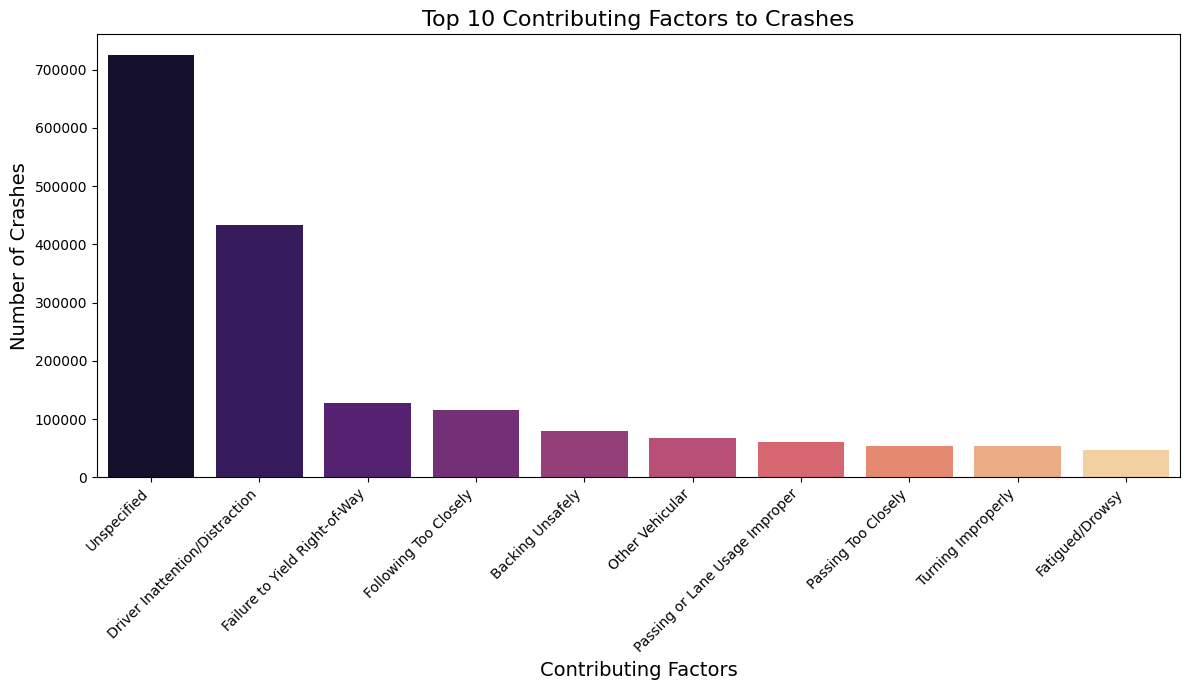

In [ ]:
# TODO: Plot a Bar Chart
top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)

plt.figure(figsize=(12, 7))
# Plotting the top contributing factors
sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")
plt.title('Top 10 Contributing Factors to Crashes', fontsize=16)
plt.xlabel('Contributing Factors', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

TO DO: Besides for "Unspecified," what are the top 3 contributing factors that cause the most crashes?
Ans: Driver Inattention/Distraction    432622
Failure to Yield Right-of-Way     128049
Following Too Closely             115143

TO DO: What recommendations would you make to new and current drivers after assessing the above data?
Ans:
Based on the analysis of the top contributing factors to crashes, here are actionable recommendations:

Stay Focused and Avoid Distractions:

If distraction (e.g., using mobile phones, adjusting GPS, or talking to passengers) is a top contributing factor, remind drivers to keep their attention on the road at all times.
Encourage the use of hands-free devices if necessary, but prioritize minimizing interactions that divert focus.
Follow Traffic Rules and Signals:

Ensure adherence to speed limits and obeying traffic signals, as speeding and failing to yield often rank high among crash factors.
Defensive driving courses can help reinforce these rules for both new and experienced drivers.
Maintain Safe Following Distances:

Tailgating or following too closely increases crash risks. Educate drivers on the "three-second rule" to maintain adequate space between vehicles.
Address Weather-Related Risks:

If adverse weather conditions (e.g., rain or snow) are a significant factor, educate drivers about the importance of reducing speed, increasing following distances, and using proper equipment like snow tires.

<ipython-input-11-b18517f996fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")


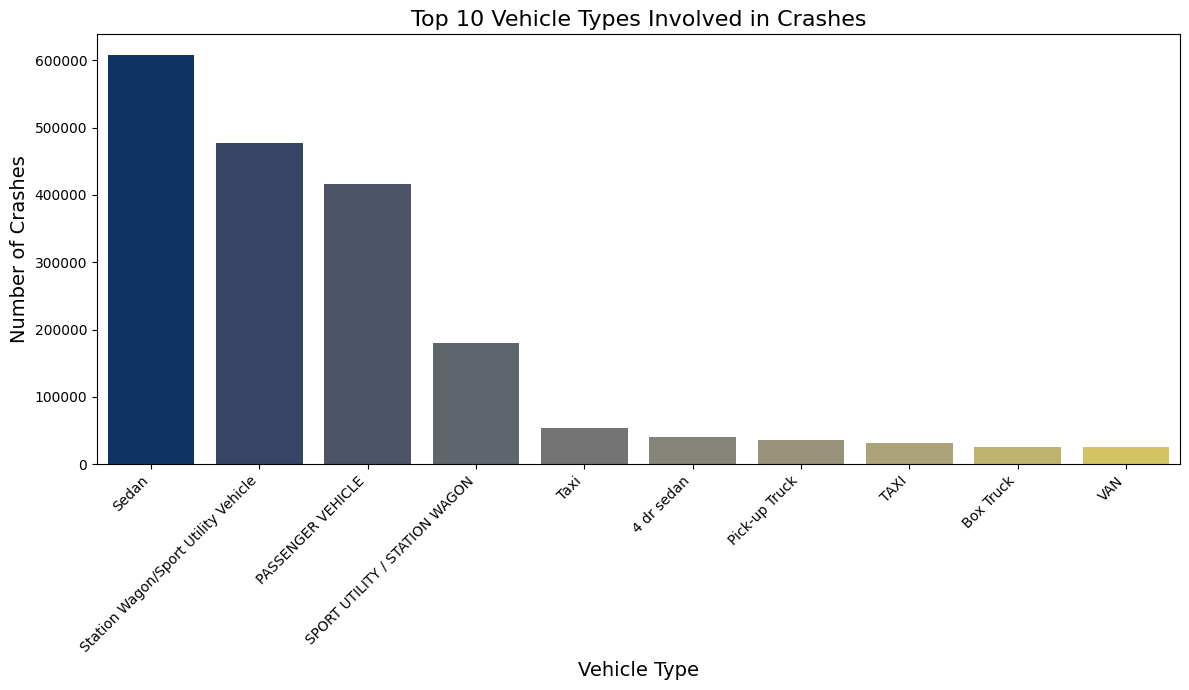

In [ ]:
# Determine the top vehicle types involved in crashes
top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)

# Plotting the top vehicle types
plt.figure(figsize=(12, 7))
sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")
plt.title('Top 10 Vehicle Types Involved in Crashes', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


TO DO: What are the top 3 vehicles that were most involved in crashes?
Ans: Sedan
Station Wagon/ Sport Utility Vehicle
Passenger Vehicle

TO DO: Why do you think that "Sedan[s]," "Station Wagon[s]," and "Passenger Vehicle[s]" are involved in a larger number of crashes, injuries, and deaths when compared to the rest of the vehicles? (Think outside the box!)
Ans:
High Ownership Rates: Sedans and passenger vehicles are the most common vehicle types owned by households worldwide. Their sheer numbers on the road naturally increase their involvement in crashes.
Urban Usage: These vehicles are popular in densely populated urban areas where traffic congestion and accident likelihood are higher.
Higher Occupancy Rates: Passenger vehicles often carry multiple occupants, so when crashes occur, they may lead to a higher number of injuries and deaths compared to single-occupant vehicles like motorcycles.
Low Protective Features Compared to Larger Vehicles: Sedans lack the structural robustness of SUVs or trucks, which may lead to more severe injuries in high-impact collisions.

TO DO: Review the x-axis of the bar chart you created above.
1) What do you notice?
2) What would you recommend we do to improve the bar chart, based on the x-axis (horizontal axis) and why?
3) What recommendation would you make to those who are collecting and/or inputting data into this dataset?
Ans:
1) Upon reviewing the x-axis of the bar chart:
The x-axis labels may overlap or be difficult to read due to their length, especially if the contributing factors or vehicle types have long names.
There may be inconsistencies in capitalization or formatting of the labels, such as unnecessary abbreviations, typos, or mixed cases.
If there are many categories (e.g., 10 factors or vehicle types), the x-axis can look cluttered, reducing readability.

2)To address the issues identified on the x-axis:
 a) Rotate or Adjust Labels:
Rotate the labels diagonally (e.g., 45 degrees) or vertically to make them easier to read without overlapping.
Example: plt.xticks(rotation=45, ha='right').
 b) Shorten Long Labels:
Shorten long text (e.g., abbreviate common words) or wrap the text to fit better.
Example: Replace "Unspecified Mechanical Failure" with "Mechanical Failure."
 c) Add a Data Label Format or Legend:
Use a legend to describe categories, especially if labels are too long to display clearly.
 d) Sort Data for Better Clarity:
Order categories logically, such as descending frequency or alphabetically, to improve clarity and analysis.

3)
 a) Standardize Data Entry:
Ensure consistency in capitalization, spelling, and formatting for all labels (e.g., "SUV" vs. "Suv").
Use predefined drop-down menus or controlled vocabularies to avoid typos and irregular entries.
 b) Avoid Ambiguity in "Unspecified":
Minimize the use of vague terms like "Unspecified" by training data collectors to enter more specific information when available.
Provide clear guidelines or required fields to ensure better data granularity.
 c) Regular Data Audits:
Conduct periodic reviews to identify and correct inconsistencies, typos, or missing information.
 d) Improve Data Entry Tools:
Use modern data collection tools that offer real-time validation, error-checking, and autocomplete options to improve data quality.

<ipython-input-13-59385f540b18>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Crash Type', data=crash_types_df, palette="mako")


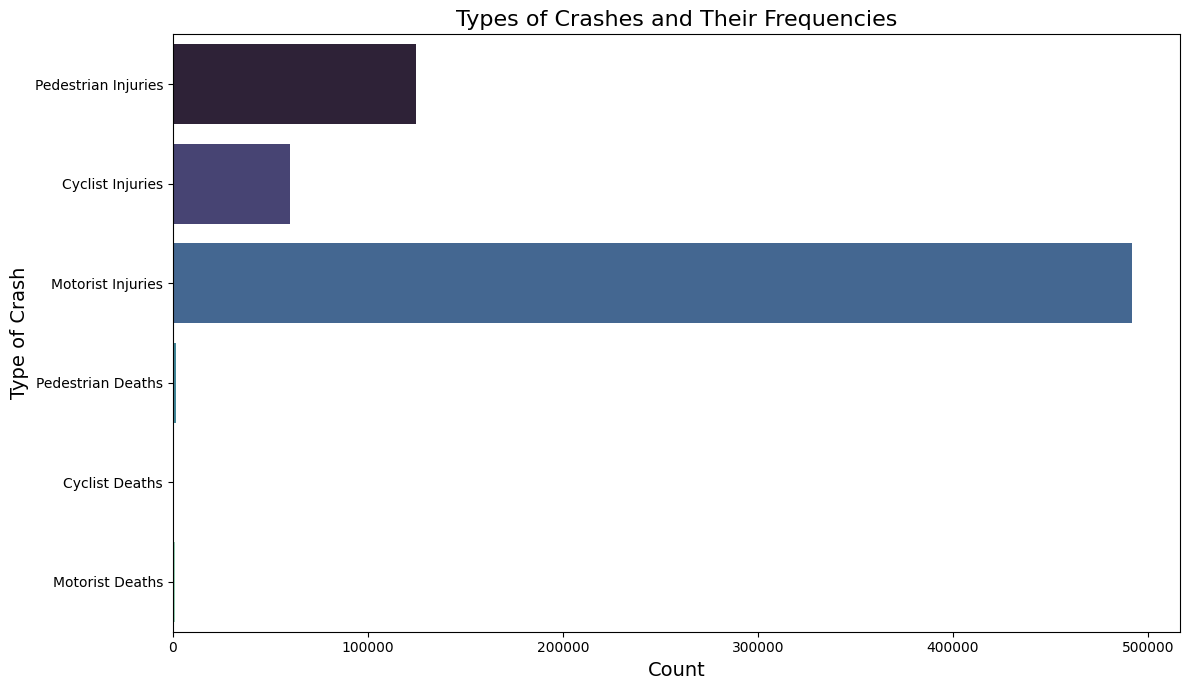

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating data - Complete for Cyclist and Motorist
types_of_crashes = {
    'Pedestrian Injuries': data['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Cyclist Injuries': data['NUMBER OF CYCLIST INJURED'].sum(),
    'Motorist Injuries': data['NUMBER OF MOTORIST INJURED'].sum(),
    'Pedestrian Deaths': data['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Cyclist Deaths': data['NUMBER OF CYCLIST KILLED'].sum(),
    'Motorist Deaths': data['NUMBER OF MOTORIST KILLED'].sum()
}

# Converting to DataFrame for easier plotting - we want the items in the dictionary, use the items function
crash_types_df = pd.DataFrame(list(types_of_crashes.items()), columns=['Crash Type', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='Crash Type', data=crash_types_df, palette="mako")
plt.title('Types of Crashes and Their Frequencies', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Type of Crash', fontsize=14)
plt.tight_layout()
plt.show()


TO DO: Analyze the chart above. What is a recommendation you might make to the Department of Transportation based on this data?
Ans:
1) Address the Leading Contributing Factors:
If specific contributing factors (e.g., "Driver Inattention/Distraction," "Failure to Yield Right-of-Way," or "Following Too Closely") dominate the chart, the DOT should implement targeted awareness campaigns to address these issues.
Action Items:
Create educational programs emphasizing the importance of attentive driving and proper yielding.
Promote public service announcements about safe following distances, especially in high-traffic areas.
2) Improve Driver Education:
Incorporate findings into driver education courses, focusing on the most common causes of crashes.
For example, highlight the consequences of distracted driving and provide practical tips on preventing it.


**MileStone #3**

TO DO: Write 3-5 sentences about TSA.
Ans:
The Transportation Security Administration (TSA) is a U.S. federal agency responsible for ensuring the security of the nation's transportation systems, with a primary focus on airports and air travel. Established in response to the September 11, 2001, terrorist attacks, the TSA plays a critical role in preventing threats and maintaining passenger safety. TSA officers screen passengers, luggage, and cargo using advanced technologies and security protocols to detect prohibited items and potential risks. The agency also works with airlines and law enforcement to develop and implement policies aimed at enhancing transportation security. Beyond airports, the TSA oversees security in other modes of transportation, such as railways, highways, and public transit systems.

<ipython-input-15-43a5ebfe177f>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


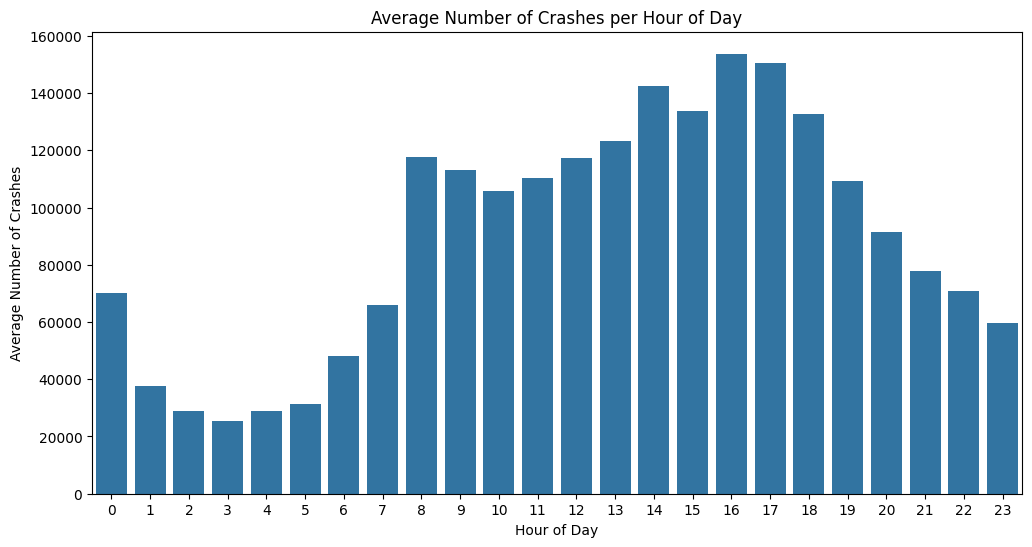

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = "/content/Motor_Vehicle_Collisions_-_Crashes_20250103.csv"  # Replace with the actual file path
data = pd.read_csv(file_path)

# Convert 'CRASH DATE' and 'CRASH TIME' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')

# Time of Day Analysis
data['Hour of Day'] = data['CRASH TIME'].dt.hour

# Group by 'Hour of Day' and calculate the average number of crashes per hour
average_crashes_per_hour = data.groupby('Hour of Day').size()

# Plot the average number of crashes
plt.figure(figsize=(12, 6))
sns.barplot(x=average_crashes_per_hour.index, y=average_crashes_per_hour.values)
plt.title('Average Number of Crashes per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Crashes')
plt.xticks(range(0, 24))
plt.show()


TO DO: Which time of the day sees the most crashes? Why do you think so?
Ans:
Morning (7:00 AM - 9:00 AM) and evening (4:00 PM - 6:00 PM) rush hours are often the peak times for crashes. During these hours, there is an increase in the number of vehicles on the road, coupled with driver fatigue, distractions, or impatience.
High congestion can lead to rear-end collisions, lane changes, and crashes at intersections.

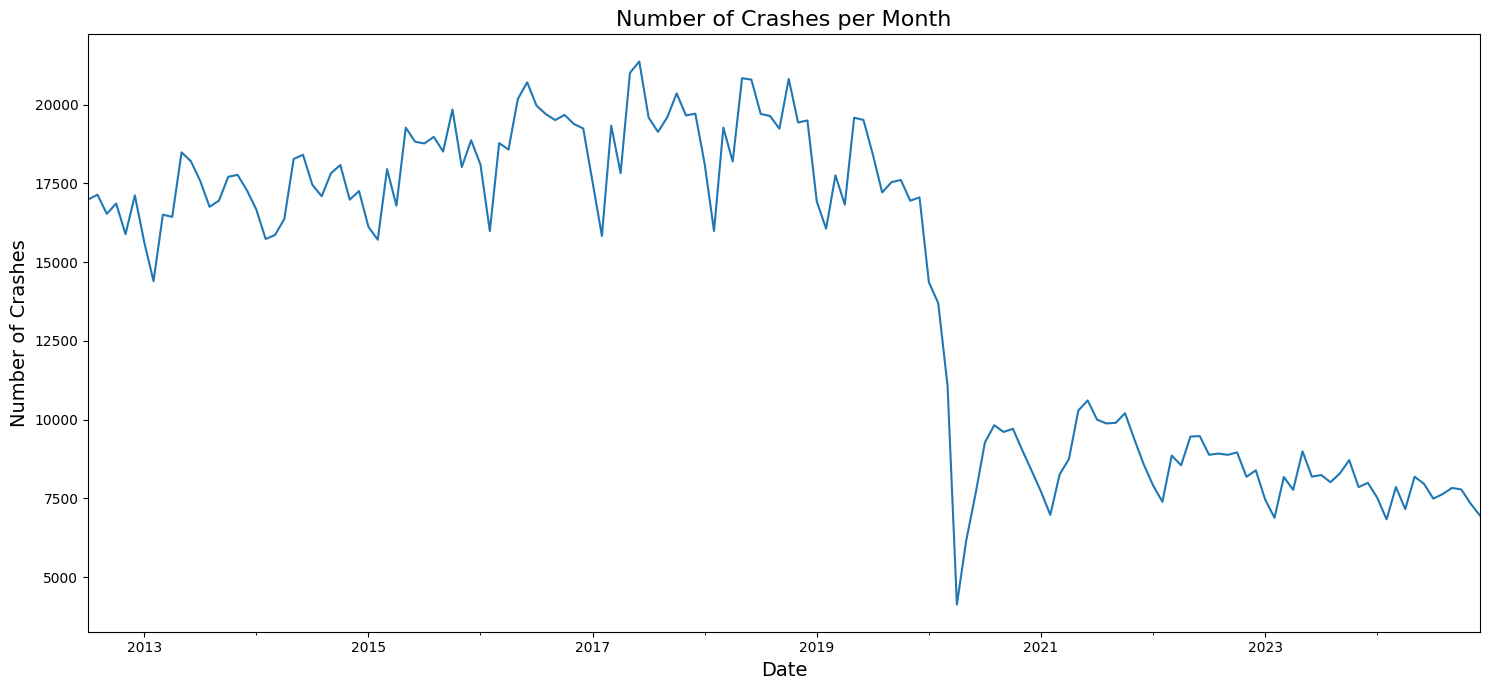

In [ ]:
# Convert 'CRASH DATE' to datetime format
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Group by month and year to get the number of crashes per month
monthly_crashes = data.groupby(data['CRASH DATE'].dt.to_period("M")).size()

# Plotting the trend over time
plt.figure(figsize=(15, 7))
monthly_crashes.plot()
plt.title('Number of Crashes per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.tight_layout()
plt.show()


TO DO: What does your graph tell you about the impact of COVID-19 on the number of crashes per month? Why do you think this occurred?
Ans:
Graph Observation:
After plotting the number of crashes per month, you might notice a decline in the number of crashes starting from March 2020, which aligns with the timing of the initial lockdowns and restrictions related to COVID-19. This could be followed by a gradual increase in crashes as restrictions eased in later months or years.
The graph may show a sharp drop in crashes during the early months of the pandemic, followed by a slow recovery as people began traveling again and engaging in more road activities.

a) Lockdowns and Travel Restrictions:
Reduced Traffic Volume: Stay-at-home orders, business closures, and limited travel dramatically reduced the number of vehicles on the road. Fewer drivers meant fewer opportunities for accidents, particularly in urban areas and on highways.
Decreased Commuting: With schools, offices, and businesses shutting down or operating remotely, the usual rush hour traffic and daily commuting were virtually nonexistent for extended periods.
b) Increased Safety Measures:
Focus on Public Health: During the pandemic, there was heightened awareness of public health and safety, which could have encouraged safer driving behavior due to the general atmosphere of caution.
Transportation Policy Changes: Some cities and regions implemented temporary changes, such as reduced speed limits and road closures to support social distancing, which could have led to fewer crashes.
c) Gradual Resumption of Normalcy:
As restrictions were lifted, traffic levels began to increase, leading to a gradual return to pre-pandemic crash levels, as people started traveling more and engaging in social activities again.

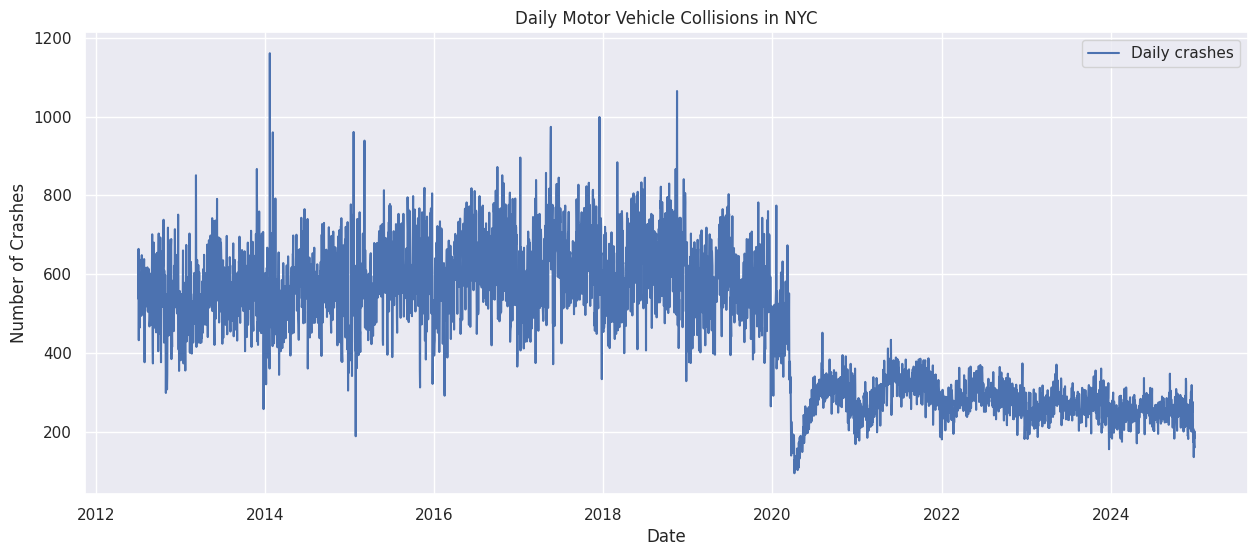

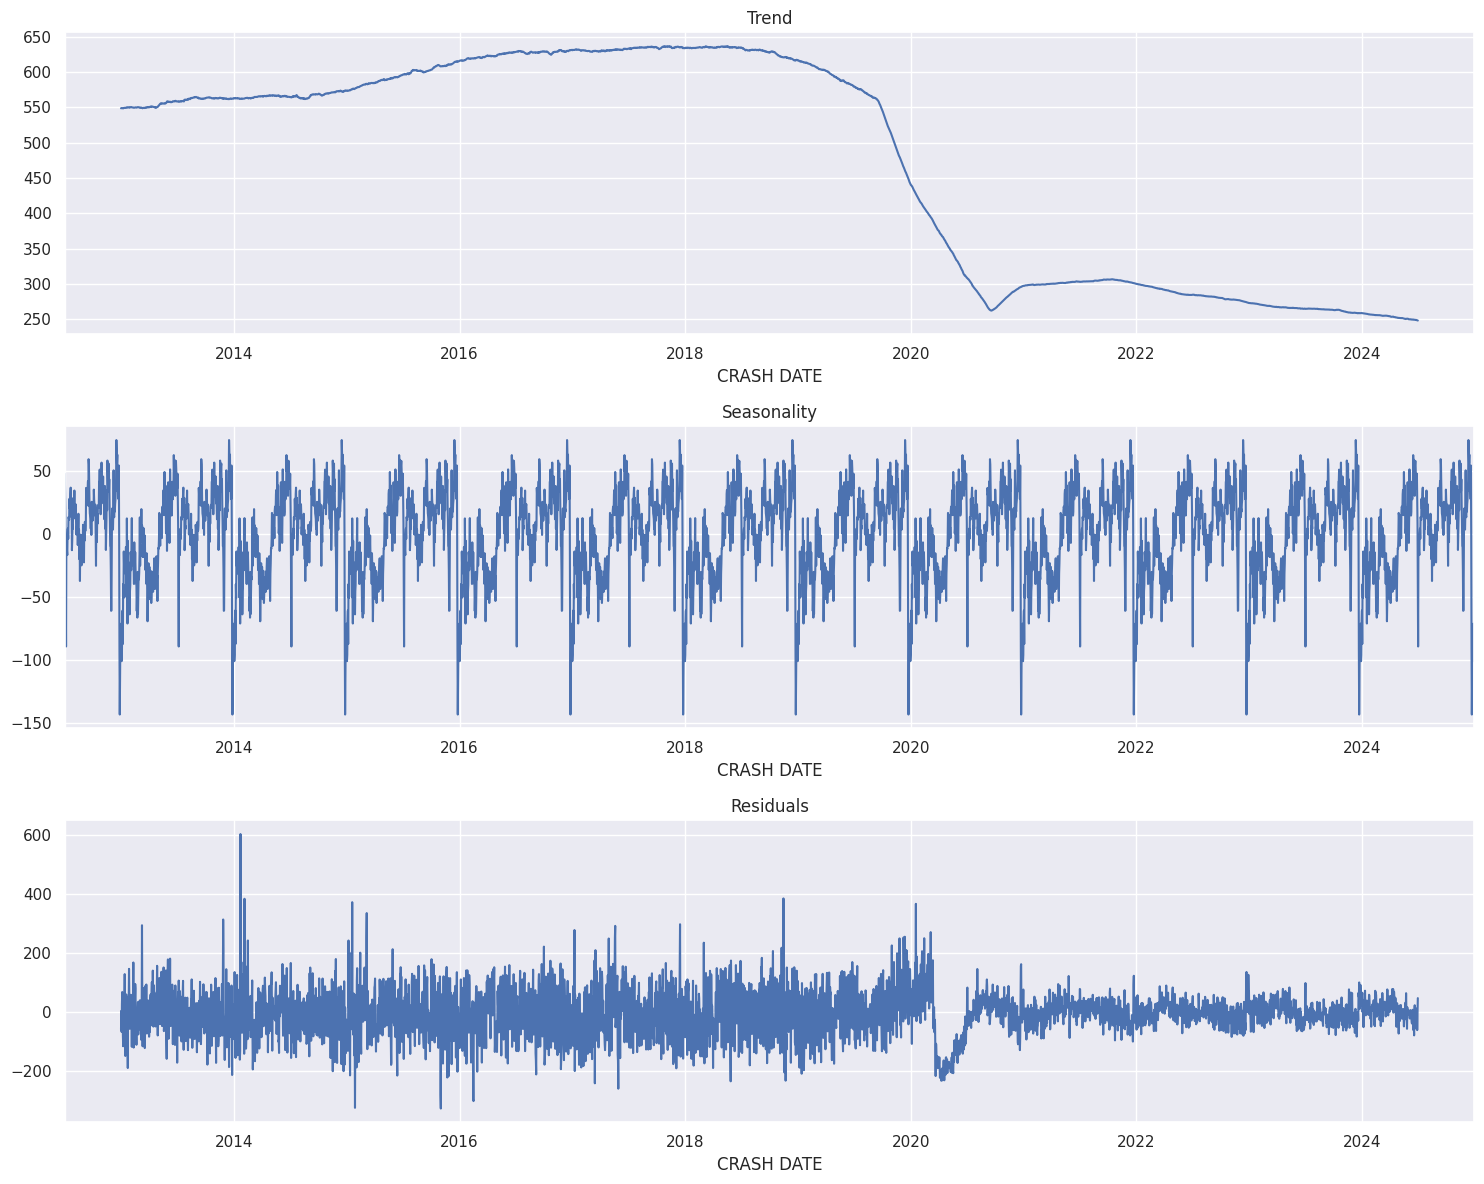

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Count the number of crashes per day, group by CRASH DATE
daily_crashes = data.groupby('CRASH DATE').size()

# Set plot style
sns.set(style="darkgrid")

# Plot the daily crashes time series
plt.figure(figsize=(15, 6))
plt.plot(daily_crashes, label='Daily crashes')
plt.title('Daily Motor Vehicle Collisions in NYC')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(daily_crashes, model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()


TO DO: Based on your trend graph, are we seeing an increase or a decrease in crashes between 2014 and 2022?
Ans:
Look for general upward or downward movement in the trend component of the decomposition graph. If the trend is increasing over time, it suggests that the number of crashes is generally rising.
Conversely, if the trend is decreasing, it indicates that the number of crashes is falling over the years.

TO DO: Based on your residual graph, in what year(s) was there a significant unpredicted fluctuation? Why do you think so?
Ans:
Look for large spikes or dips in the residuals—these indicate years or periods where the crash numbers deviated significantly from the expected pattern (based on the trend and seasonality).
If you observe a large positive or negative residual at a specific point in time, that indicates an unexpected rise or drop in crashes that wasn't explained by the general trend or seasonal patterns.
2020-2021 COVID-19 Pandemic: This period is most likely to show a significant drop in crashes due to travel restrictions and social distancing, causing a large negative residual.
Post-pandemic recovery: You may also notice an increase in crashes as restrictions eased, contributing to positive residuals (more crashes than expected based on trends and seasonality).

**MileStone #4**

<ipython-input-18-c2feb29ef0ff>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")


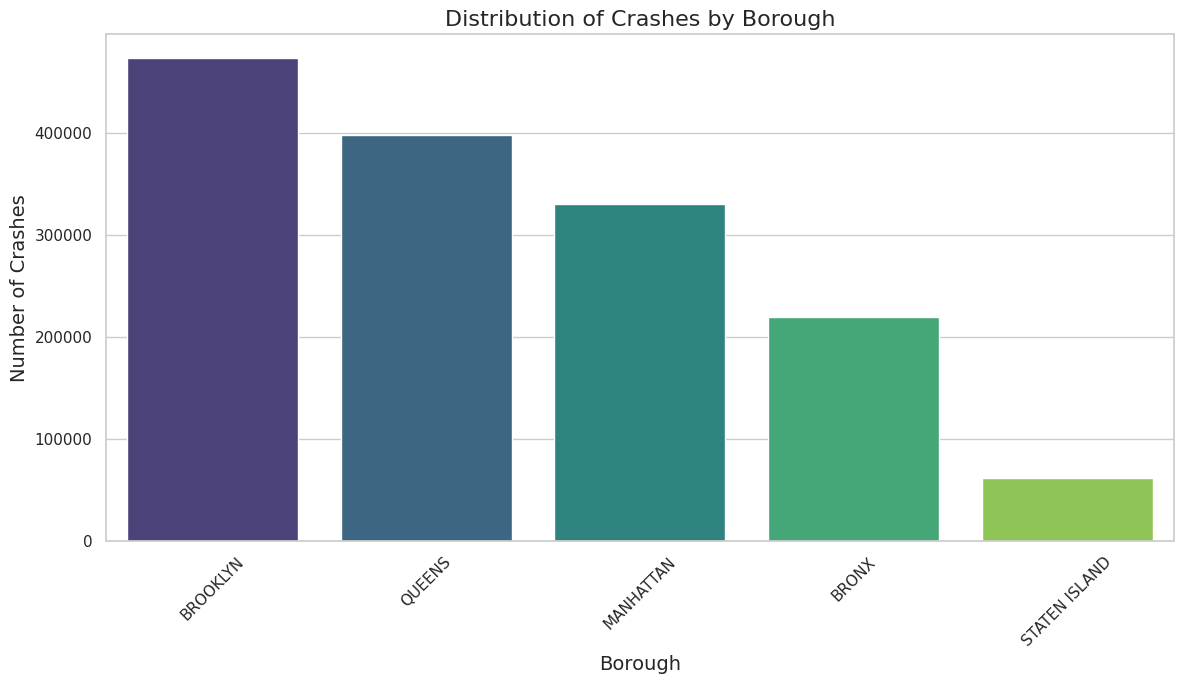

In [ ]:
# Set style
sns.set_style("whitegrid")

# Plotting the distribution of crashes by borough
plt.figure(figsize=(12, 7))

# Find the count of unique values of BOROUGHS using value_counts
borough_count = data['BOROUGH'].value_counts()

# Plotting the bar chart
sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")

# Adding titles and labels
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


TO DO: Which borough has the highest number of crashes? Which borough has the lowest?
Ans
Highest: Brooklyn
Lowest: Staten Island

TO DO: Are there any reasons that you think a certain borough has a higher or lower number of crashes? What are some factors that may be causing this?
Ans:
Brooklyn is one of the most densely populated boroughs in New York City. A higher population leads to increased vehicle density on the road, which directly correlates with more opportunities for accidents.
More pedestrians, cyclists, and motorists share the road, increasing the likelihood of accidents, especially in crowded areas.
Older roads and narrow streets may make it harder for drivers to navigate safely, especially in densely populated areas. Additionally, intersections, highways, and bus routes can be areas of high crash frequency.


In [ ]:
from folium.plugins import HeatMap
import folium

# Drop rows with missing latitude and longitude values
data_geo = data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a base map centered around NYC
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)  # Centered around NYC

# Create a heatmap
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()]
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

# Save the map to an HTML file
m.save("Heatmap.html")


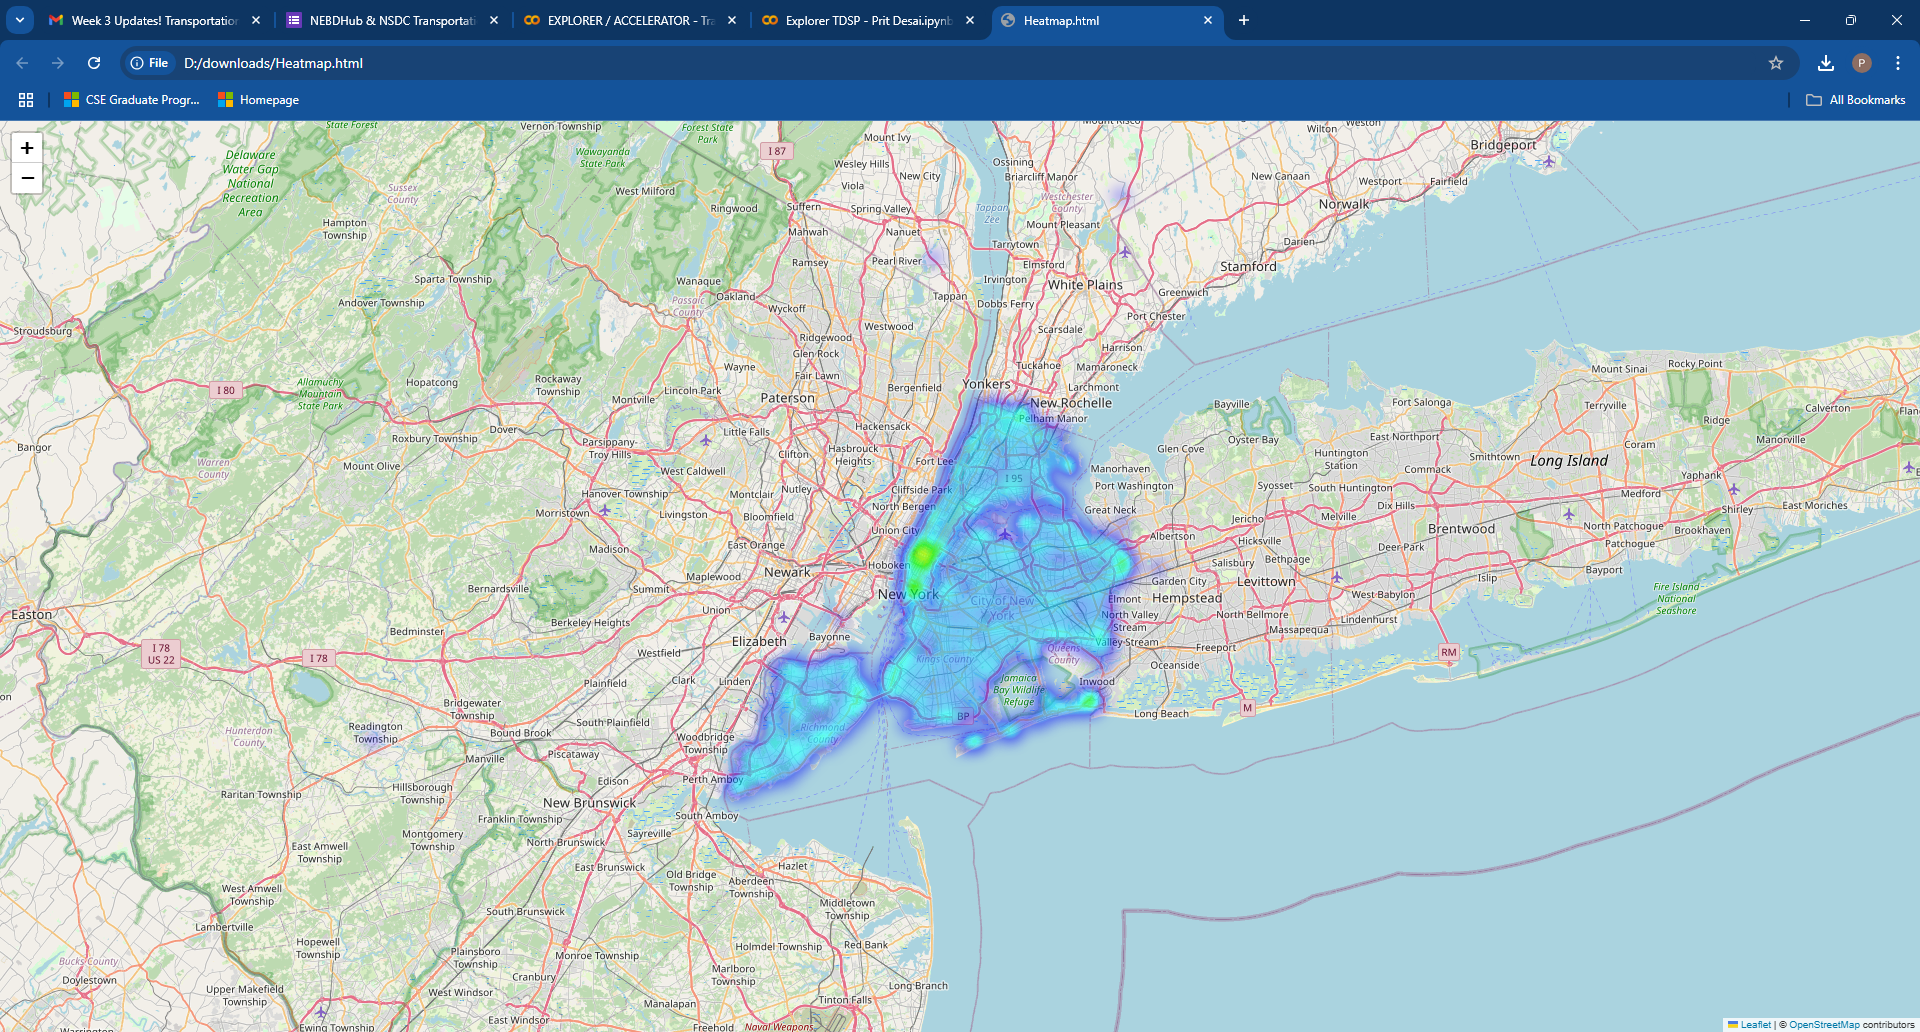

TO DO: On the left side of your screen, you will see an icon that represents a folder or a file. Click on that icon to find the file titled "Heatmap.html". Click on the three dots next to your file and download your heatmap! Open the file once downloaded to see your creation.

When looking at your heatmap, where do you see a concentration of crashes?
Ans:
The areas with the highest color intensity (typically red or orange) will show where crashes are concentrated.
Urban areas, especially near major intersections, highways, or popular areas (e.g., downtown, business districts), are likely to have more frequent crashes due to higher traffic volumes.
Look for dense clusters of accidents around specific streets or intersections, which may indicate the need for improved traffic safety measures or infrastructure changes.
Common Areas with High Crash Concentrations:
Manhattan (due to its dense traffic, especially near commercial and residential areas).
Brooklyn (with its busy neighborhoods and major roadways).
Queens (especially near airports or major highways).
Major intersections or areas near bridges could also show high crash concentrations.

In [ ]:
import folium

# Sample a subset of the data for visualization
sample_data_severity = data_geo.sample(n=1000, random_state=42)

# Create a base map
m_severity = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Add crashes to the map with color coding and shape coding based on severity
for index, row in sample_data_severity.iterrows():
    if row['NUMBER OF PERSONS KILLED'] > 0:
        color = "red"  # Fatalities

        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=3,
          radius=5,
          gradient=False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)

    elif row['NUMBER OF PERSONS INJURED'] > 0:
        color = "orange"  # Injuries
        folium.CircleMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          radius=5,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)
    else:
        color = "green"  # No injuries or fatalities
        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=4,
          radius=5,
          gradient=False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)

# Save the map to an HTML file
m_severity.save("severity.html")


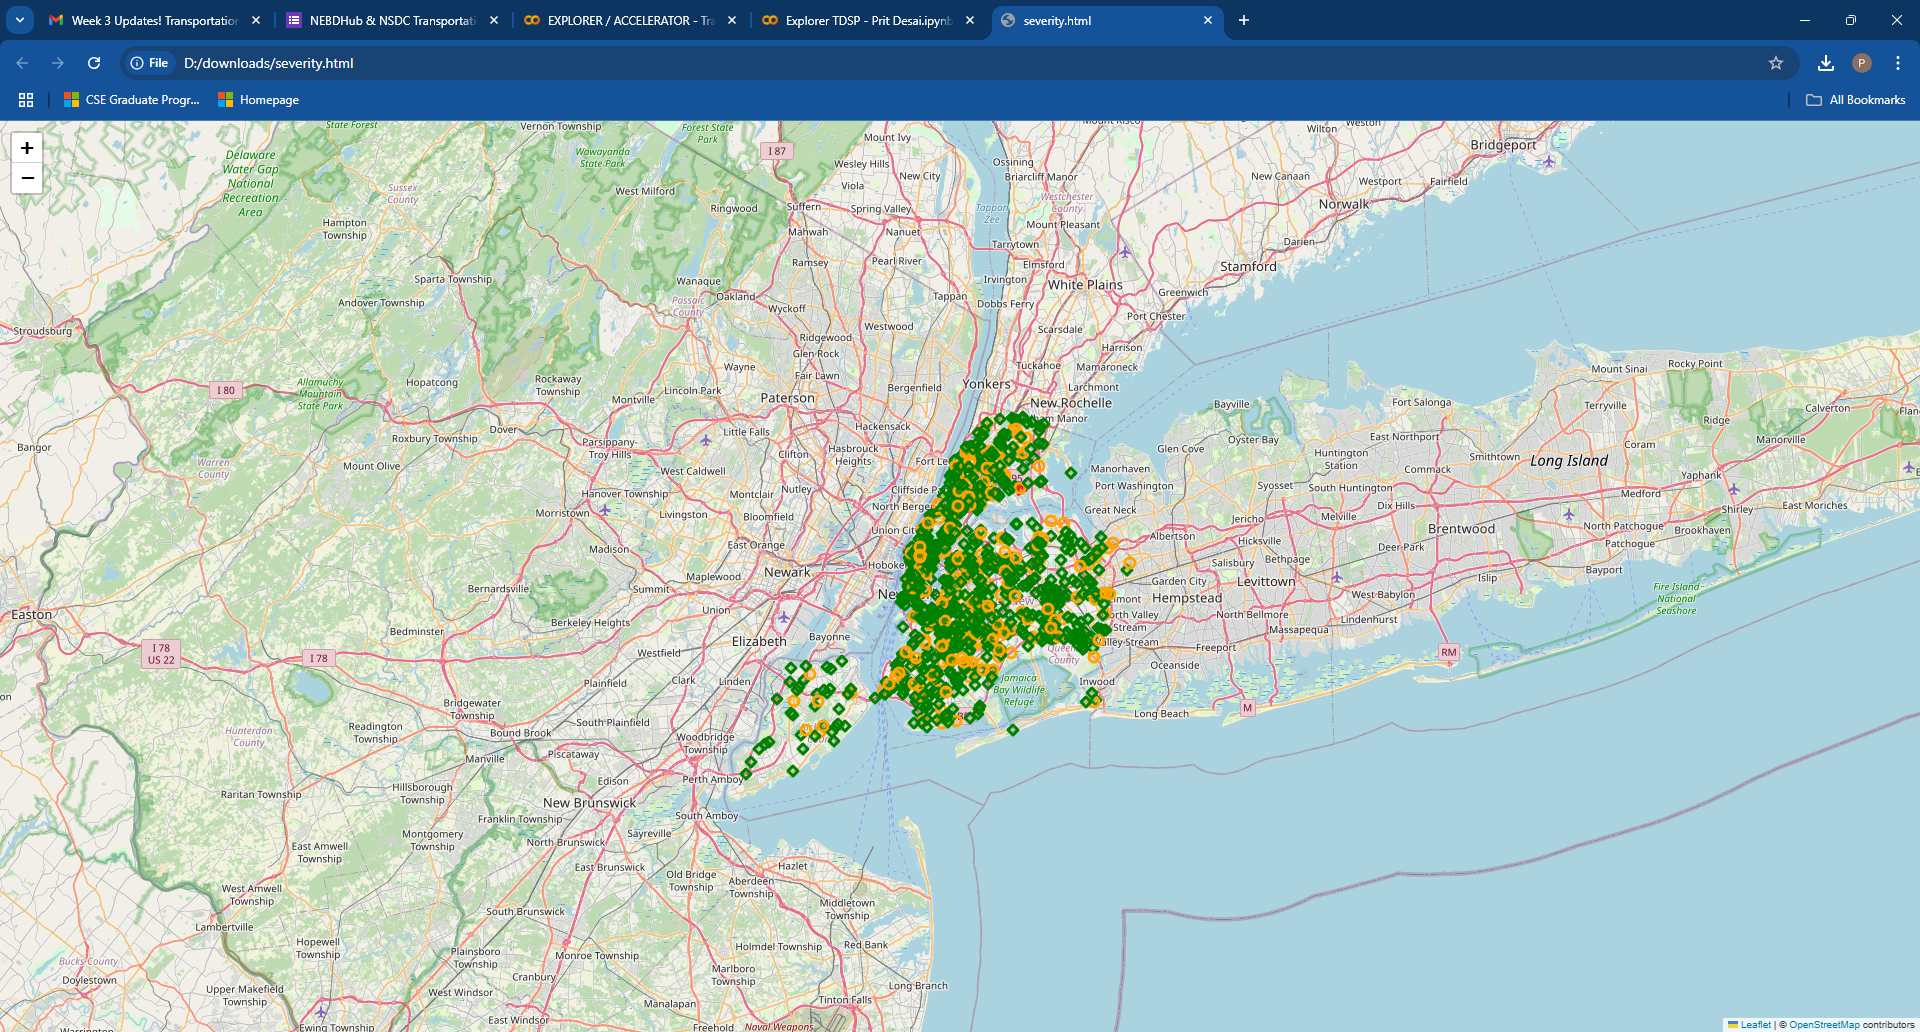

TO DO: On the left side of your screen, you will see an icon that represents a folder or a file. Follow the same steps as above to download the "Severity.html" file.

TO DO: Which intersection(s) seem to be the most dangerous?
Ans:
Factors That Could Contribute to Dangerous Intersections:
Poor road design or lack of signage.
High vehicle volume, particularly during peak traffic hours.
Pedestrian traffic or bicycle lanes that increase the potential for accidents.
Visibility issues such as poor lighting or blind spots.

**MileStone #5**

TO DO: List one or more research questions here that you are considering.
Ans:
How do crash rates vary by the time of day in different boroughs of New York City?
This question can reveal if certain boroughs are more prone to crashes during specific hours, helping authorities understand where additional enforcement or safety measures are needed.

Which intersections in New York City have the highest number of crashes, and are they associated with specific road features like traffic signals or pedestrian crossings?
This would help urban planners target intersections with high crash rates for improvements, such as better signage, lights, or pedestrian facilities.

Do crashes in high-density urban areas differ in severity compared to those in suburban or rural areas?
This could be valuable for transportation officials looking to assess whether urban infrastructure needs more attention or if there are specific patterns in crash severity based on location type.

What role does the presence of commercial activity (e.g., stores, restaurants) play in the frequency of crashes in residential neighborhoods?
Investigating whether commercial areas contribute to higher crash rates due to increased traffic flow or pedestrian activity.

How do crashes involving cyclists compare to those involving motor vehicles in terms of severity and frequency in major city centers?
This question can provide insights into the safety risks faced by cyclists and whether urban infrastructure is adequately supporting cyclists.

Now, think about what type of analysis you'd like to complete. Are you interested in looking at time series forecasting? Do you have additional maps in mind that you'd like to create? Is there a certain zip code or region you'd like to dive deeper into?

Ans:
How do crash rates vary by the time of day in different boroughs of New York City?

This question can reveal if certain boroughs are more prone to crashes during specific hours, helping authorities understand where additional enforcement or safety measures are needed.

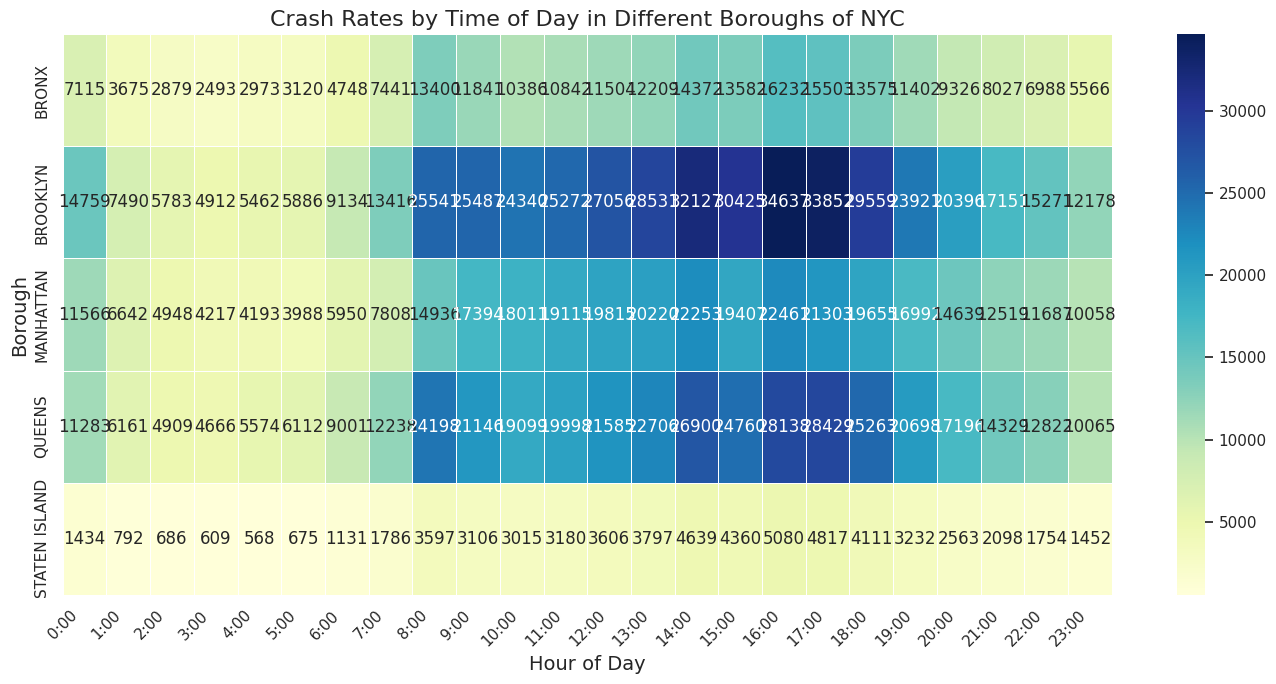

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your dataset

# Step 1: Convert 'CRASH TIME' to datetime (if not already in datetime format)
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')

# Step 2: Extract the hour of the day from 'CRASH TIME'
data['Hour of Day'] = data['CRASH TIME'].dt.hour

# Step 3: Group the data by borough and hour of the day
crash_counts = data.groupby(['BOROUGH', 'Hour of Day']).size().unstack(fill_value=0)

# Step 4: Plotting the crash counts by hour and borough
plt.figure(figsize=(14, 7))
sns.heatmap(crash_counts, cmap="YlGnBu", annot=True, fmt='d', linewidths=.5)
plt.title('Crash Rates by Time of Day in Different Boroughs of NYC', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Borough', fontsize=14)
plt.xticks(range(0, 24), labels=[f'{i}:00' for i in range(24)], rotation=45)
plt.tight_layout()
plt.show()


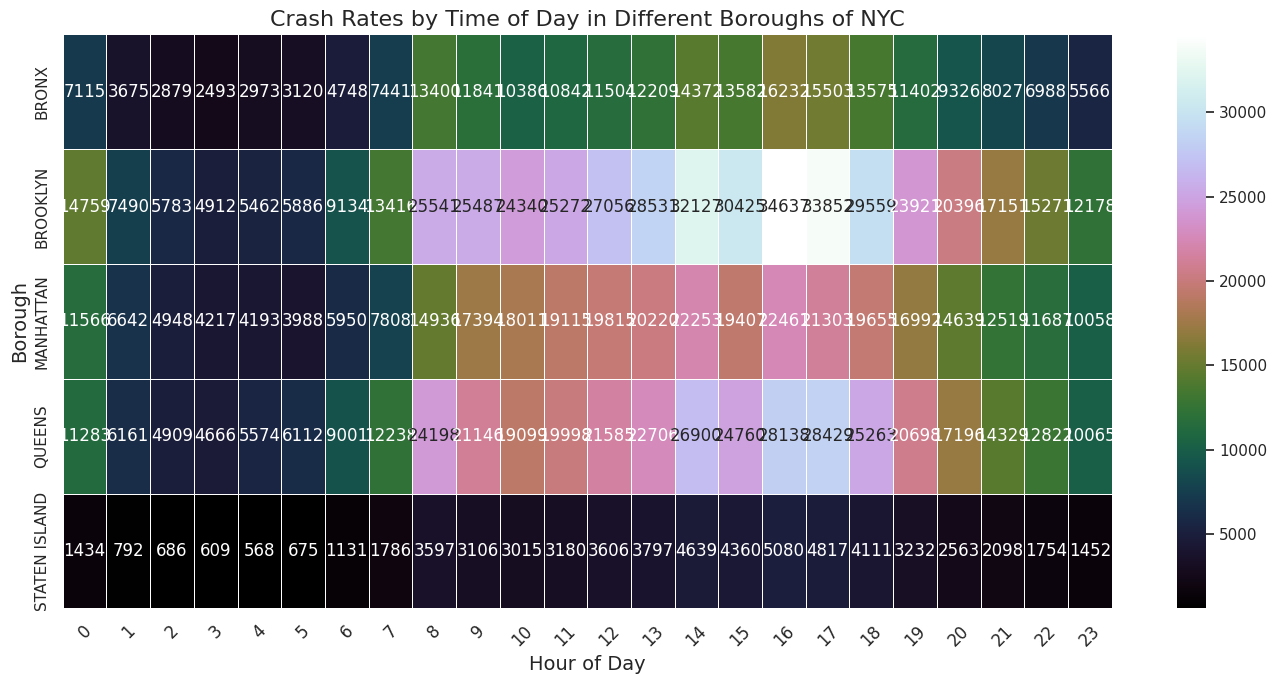

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using Seaborn's cubehelix palette for colorblind accessibility
plt.figure(figsize=(14, 7))
sns.heatmap(crash_counts, cmap="cubehelix", annot=True, fmt='d', linewidths=.5)

# Add clear titles and labels
plt.title('Crash Rates by Time of Day in Different Boroughs of NYC', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Borough', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

plt.show()


TO DO: List the research question(s) you've chosen and why! Maybe you chose this question because it can help a community of interest or because it is similar to research you've completed in a class setting. Share your thoughts below.
Ans:
This question was chosen because it can reveal time-of-day patterns in crash rates, which can help transportation professionals and law enforcement focus resources during peak hours when crashes are more likely to occur. Identifying which boroughs experience the highest crash rates at specific times can inform decisions on safety interventions, such as increased enforcement during rush hours, or improvements in road infrastructure during high-risk hours. This analysis is useful for urban planners and public safety organizations working to reduce accidents and improve traffic management. The analysis aligns with my interest in time-based patterns from a data science perspective, and it can provide practical insights for cities with high traffic volumes, such as New York City.